## Classification & Neural Networks

## Prepare Data

In [1]:
# Load libraries
import numpy as np                             # linear algebra
import pandas as pd                            # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                # MATLAB-like way of plotting

from pandas import set_option

In [2]:
# Load dataset
nba_rookie_data = pd.read_csv('nba_rookie_data.csv')

## Summarize Data

In [3]:
# display dataset in rows and columns
display(nba_rookie_data.head())

# display number of rows and columns
nba_rookie_data.shape

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


(1340, 21)

In [4]:
# list the column names
nba_rookie_data.columns

Index(['Name', 'Games Played', 'Minutes Played', 'Points Per Game',
       'Field Goals Made', 'Field Goal Attempts', 'Field Goal Percent',
       '3 Point Made', '3 Point Attempt', '3 Point Percent', 'Free Throw Made',
       'Free Throw Attempts', 'Free Throw Percent', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'TARGET_5Yrs'],
      dtype='object')

## Descriptive statistics

In [5]:
# descriptions
set_option('precision', 1)
display(nba_rookie_data.describe())

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1329.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0
mean,60.4,17.6,6.8,2.6,5.9,44.2,0.2,0.8,19.3,1.3,1.8,70.3,1.0,2.0,3.0,1.6,0.6,0.4,1.2,0.6
std,17.4,8.3,4.4,1.7,3.6,6.1,0.4,1.1,16.0,1.0,1.3,10.6,0.8,1.4,2.1,1.5,0.4,0.4,0.7,0.5
min,11.0,3.1,0.7,0.3,0.8,23.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.3,0.0,0.0,0.0,0.1,0.0
25%,47.0,10.9,3.7,1.4,3.3,40.2,0.0,0.0,0.0,0.6,0.9,64.7,0.4,1.0,1.5,0.6,0.3,0.1,0.7,0.0
50%,63.0,16.1,5.5,2.1,4.8,44.1,0.1,0.3,22.4,1.0,1.5,71.2,0.8,1.7,2.5,1.1,0.5,0.2,1.0,1.0
75%,77.0,22.9,8.8,3.4,7.5,47.9,0.4,1.2,32.5,1.6,2.3,77.6,1.4,2.6,4.0,2.0,0.8,0.5,1.5,1.0
max,82.0,40.9,28.2,10.2,19.8,73.7,2.3,6.5,100.0,7.7,10.2,100.0,5.3,9.6,13.9,10.6,2.5,3.9,4.4,1.0


## Data Anlaysis

In [6]:
# correlation
set_option('precision', 3)
display(nba_rookie_data.corr(method='pearson'))

# Considering attributes that are strongly correlated to price
# Using values not less that 0.25 to select the attributes that are strongly correlated to price ,
# Attributes that are strongly correlated with price are :
# Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts
# Free Throw Made,Free Throw Attempts,Offensive Rebounds,Defensive Rebounds,Rebounds,Turnovers

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
Games Played,1.000,0.590,0.538,0.543,0.517,0.296,0.107,0.099,0.038,0.482,0.479,0.196,0.401,0.467,0.460,0.373,0.451,0.276,0.518,0.397
Minutes Played,0.590,1.000,0.912,0.903,0.910,0.204,0.390,0.403,0.166,0.791,0.780,0.240,0.573,0.746,0.710,0.629,0.757,0.399,0.826,0.318
Points Per Game,0.538,0.912,1.000,0.991,0.980,0.255,0.347,0.357,0.151,0.896,0.881,0.259,0.575,0.694,0.677,0.552,0.675,0.387,0.850,0.316
Field Goals Made,0.543,0.903,0.991,1.000,0.980,0.292,0.289,0.299,0.119,0.848,0.840,0.224,0.597,0.703,0.691,0.533,0.663,0.398,0.834,0.318
Field Goal Attempts,0.517,0.910,0.980,0.980,1.000,0.130,0.390,0.414,0.197,0.827,0.806,0.270,0.504,0.640,0.614,0.590,0.690,0.322,0.846,0.293
Field Goal Percent,0.296,0.204,0.255,0.292,0.130,1.000,-0.294,-0.351,-0.331,0.246,0.300,-0.161,0.511,0.411,0.465,-0.109,0.057,0.392,0.122,0.227
3 Point Made,0.107,0.390,0.347,0.289,0.390,-0.294,1.000,0.983,0.590,0.158,0.095,0.314,-0.219,0.017,-0.073,0.377,0.307,-0.159,0.258,0.037
3 Point Attempt,0.099,0.403,0.357,0.299,0.414,-0.351,0.983,1.000,0.582,0.174,0.108,0.324,-0.232,0.011,-0.081,0.411,0.339,-0.172,0.284,0.018
3 Point Percent,0.038,0.166,0.151,0.119,0.197,-0.331,0.590,0.582,1.000,0.030,-0.032,0.326,-0.289,-0.123,-0.191,0.262,0.194,-0.242,0.108,-0.003
Free Throw Made,0.482,0.791,0.896,0.848,0.827,0.246,0.158,0.174,0.030,1.000,0.981,0.258,0.584,0.654,0.654,0.476,0.600,0.407,0.805,0.297


In [7]:
nba_rookie_data_df=nba_rookie_data.drop(['Name','Field Goal Percent','3 Point Made','3 Point Attempt','3 Point Percent','Free Throw Percent','Assists','Steals','Blocks'],axis=1)

In [8]:
#nba_rookie_data_df.head()

In [9]:
data =nba_rookie_data_df.values
X= data[:,0:11]
y =data[:,11]

## Logistic Regression Model

In [10]:
# sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [11]:
logre = LogisticRegression()
logre.fit(X, y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
# using arbitary numbers for prediction
test_point = [[44.6,10.3,5.2,3.9,6.7,2.9,2.3,0.9,1.7,5.2,1.1]]
y_pred = logre.predict(np.array(test_point))
print('Prediction:', y_pred)

Prediction: [1.]


In [13]:
print('Our Accuracy is %.2f' % logre.score(X, y))

Our Accuracy is 0.71


In [14]:
print('Number of mislabeled points out of a total %d points : %d'% (X.shape[0], (y != logre.predict(X)).sum()))

Number of mislabeled points out of a total 1340 points : 390


## Inclusion of many features

In [15]:

# remove unwanted features
nba_rookie_data=nba_rookie_data.drop(columns=['3 Point Percent','Name'])

In [16]:
#nba_rookie_data.head()

In [17]:
X_new= nba_rookie_data.values[:,0:18]
y_new =nba_rookie_data.values[:,18]

In [18]:
logre = LogisticRegression()
logre.fit(X_new, y_new)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
# using Arbitary numbers for prediction
test_point = [[74.4,21.6,8.8,4.6,7.8,46.1,0.6,0.9,3.2,3.8,88.3,3.1,4.3,5.3,3.5,0.9,0.6,3.2]]
y_new_pred = logre.predict(np.array(test_point))
print('Prediction:', y_new_pred)

Prediction: [1.]


In [20]:
print('Our Accuracy is %.2f' % logre.score(X_new, y_new))

Our Accuracy is 0.71


In [21]:
print('Number of mislabeled points out of a total %d points : %d'% (X_new.shape[0], (y_new != logre.predict(X_new)).sum()))

Number of mislabeled points out of a total 1340 points : 384


## Gaussian Naive Bayes Model

In [22]:
# sklearn package for machine learning in python:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

In [23]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [24]:
print('Predict a value %d:' % gnb.predict([[44.6,10.3,5.2,3.9,6.7,2.9,2.3,0.9,1.7,5.2,1.1]]))

Predict a value 1:


In [25]:
print('Our Accuracy is %.2f' % gnb.score(X, y))

Our Accuracy is 0.62


In [26]:
print('Number of mislabeled points out of a total %d points : %d'% (X.shape[0], (y != gnb.predict(X)).sum()))

Number of mislabeled points out of a total 1340 points : 506


## With Many Features

In [27]:
gnb = GaussianNB()
gnb.fit(X_new, y_new)

GaussianNB()

In [28]:
print('Predict a value %d:' % gnb.predict([[74.4,21.6,8.8,4.6,7.8,46.1,0.6,0.9,3.2,3.8,88.3,3.1,4.3,5.3,3.5,0.9,0.6,3.2]]))

Predict a value 1:


In [29]:
print('Our Accuracy is %.2f' % gnb.score(X_new, y_new))

Our Accuracy is 0.63


In [30]:
print('Number of mislabeled points out of a total %d points : %d'% (X_new.shape[0], (y_new != gnb.predict(X_new)).sum()))

Number of mislabeled points out of a total 1340 points : 500


## Neural Networks Model

In [31]:
# sklearn package for machine learning in python:
from sklearn.neural_network import MLPClassifier

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(), activation="logistic",random_state=0, max_iter=2000)

In [33]:
mlp.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=0)

In [34]:
print('Prediction:', mlp.predict([[44.6,10.3,5.2,3.9,6.7,2.9,2.3,0.9,1.7,5.2,1.1]]))

Prediction: [1.]


In [35]:
print('Our Accuracy is %.2f' % mlp.score(X, y))

Our Accuracy is 0.70


In [36]:
print('Number of mislabeled points out of a total %d points : %d'% (X.shape[0], (y != mlp.predict(X)).sum()))

Number of mislabeled points out of a total 1340 points : 401


## With many features

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(), activation="logistic",random_state=0, max_iter=2000)

In [38]:
mlp.fit(X_new, y_new)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=0)

In [39]:
print('Prediction:', mlp.predict([[74.4,21.6,8.8,4.6,7.8,46.1,0.6,0.9,3.2,3.8,88.3,3.1,4.3,5.3,3.5,0.9,0.6,3.2]]))

Prediction: [1.]


In [40]:
print('Our Accuracy is %.2f' % mlp.score(X_new, y_new))

Our Accuracy is 0.71


In [41]:
print('Number of mislabeled points out of a total %d points : %d'% (X_new.shape[0], (y_new != mlp.predict(X_new)).sum()))

Number of mislabeled points out of a total 1340 points : 395


## Visualising the Logistic Regression Model

In [42]:
import seaborn as sns
%matplotlib inline 

(0, 1.053709835663478)

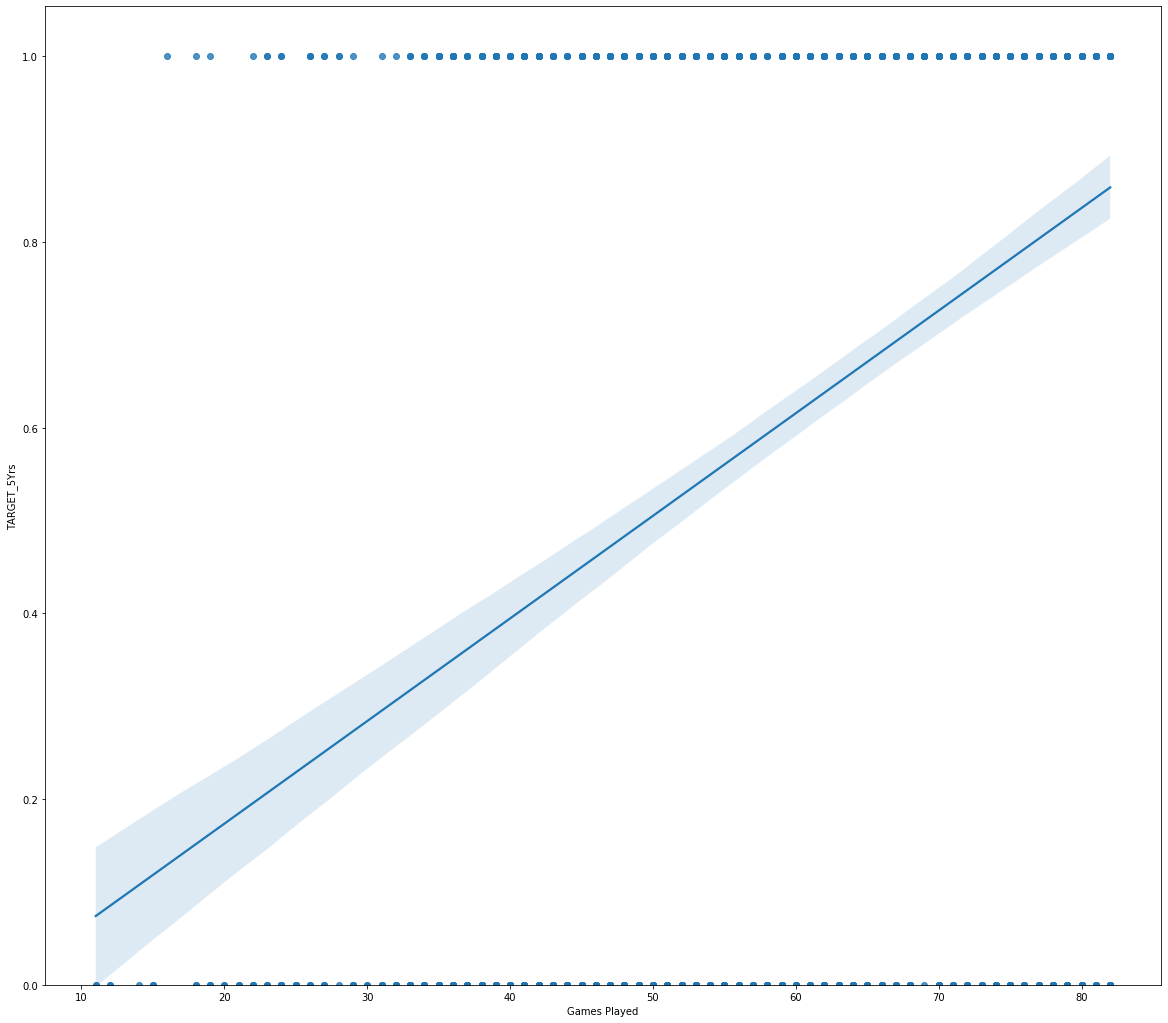

In [44]:
width = 20
height = 18
plt.figure(figsize=(width, height))
sns.regplot(x="Games Played", y="TARGET_5Yrs", data=nba_rookie_data )
plt.ylim(0,)